# 1. Loading data

In [3]:
import pandas as pd
from sklearn.cross_validation import cross_val_score
import numpy as np
import matplotlib.pyplot as p
train_images = pd.read_csv("./train.csv")
test_images = pd.read_csv("./test.csv")

train_images_numpy = train_images[train_images.columns[1:]].as_matrix()

%matplotlib inline  

# 2. Visualization

## 2.1 Visualization of 1s and 8s using PCA

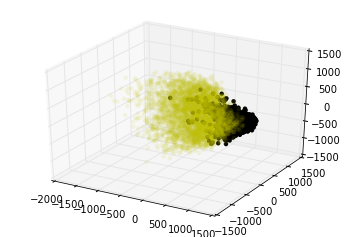

In [4]:
from  sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

ones = train_images[train_images['label']==1]
ones_numpy = ones[train_images.columns[1:]].as_matrix()

#fours = train_images[train_images['label']==4]
#fours_numpy = ones[train_images.columns[1:]].as_matrix()

eights = train_images[train_images['label']==8]
eights_numpy = eights[train_images.columns[1:]].as_matrix()

pca = PCA(n_components=3)
pca.fit(train_images_numpy)
ones_3pca = pca.transform(ones_numpy)
eights_3pca = pca.transform(eights_numpy)
#fours_3pca = pca.transform(fours_numpy)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(eights_3pca[:,0], eights_3pca[:,1], eights_3pca[:,2],c='y', marker='o',alpha=0.1,lw = 0)
ax.scatter(ones_3pca[:,0], ones_3pca[:,1], ones_3pca[:,2],c='k', marker='o',alpha=0.998,lw = 0)
#ax.scatter(fours_3pca[:,0], fours_3pca[:,1], fours_3pca[:,2],c='g', marker='o',alpha=0.1,lw = 0)

plt.show()



## 2.2 Digits

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


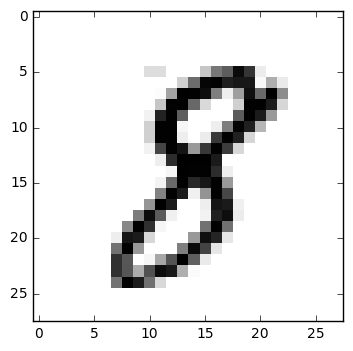

In [4]:

from matplotlib import pyplot as plt
from math import sqrt

def show_digit(digit_numpy):
    dimension = sqrt(len(digit_numpy))
    x = digit_numpy.reshape(dimension,dimension)
    plt.imshow(255-x, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
    #plt.savefig('text.png')
    plt.show()

show_digit(eights_numpy[1,:])


## 2.3 Class Distribution

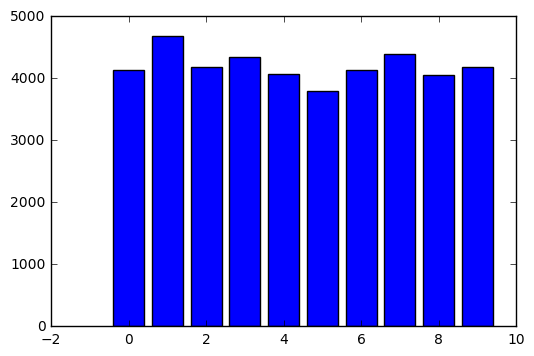

In [5]:

dist = np.histogram(train_images['label'],bins=range(11))
plt.bar( range(10),dist[0],  color="b",align='center')
plt.show()

  # 3. Feature Engineering

## 3.1 Feature Scaling

In [6]:
from sklearn.preprocessing import scale
train_scaled  = scale(train_images_numpy)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


# 4. Classification

## 4.1 KNN 

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

knn= KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm ='auto')
scores = cross_val_score(knn, train_scaled, train_images['label'], cv=3)
np.mean(scores)

0.93452384086044205

## 4.2 Multi Layer Perceptron

In [141]:
from sklearn.neural_network import MLPClassifier
mlpclf = MLPClassifier(hidden_layer_sizes=(100,50), 
                    verbose=1, tol=1e-4, random_state=1)
scores = cross_val_score(mlpclf, train_scaled, train_images['label'], cv=3)
np.mean(scores)

Iteration 1, loss = 0.50258791
Iteration 2, loss = 0.16010021
Iteration 3, loss = 0.10514254
Iteration 4, loss = 0.07498868
Iteration 5, loss = 0.05348108
Iteration 6, loss = 0.03900947
Iteration 7, loss = 0.02950798
Iteration 8, loss = 0.02035792
Iteration 9, loss = 0.01493498
Iteration 10, loss = 0.01126419
Iteration 11, loss = 0.00739240
Iteration 12, loss = 0.00589090
Iteration 13, loss = 0.00485641
Iteration 14, loss = 0.00356619
Iteration 15, loss = 0.00253034
Iteration 16, loss = 0.00196728
Iteration 17, loss = 0.00162184
Iteration 18, loss = 0.00138005
Iteration 19, loss = 0.00117213
Iteration 20, loss = 0.00103047
Iteration 21, loss = 0.00090170
Iteration 22, loss = 0.00081764
Iteration 23, loss = 0.00070688
Iteration 24, loss = 0.00064656
Iteration 25, loss = 0.00058450
Iteration 26, loss = 0.00053006
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.50090277
Iteration 2, loss = 0.16157516
Iteration 3, loss = 0.10

0.96054707329757283

## 4.3 Ensemble Method

In [10]:
from sklearn.ensemble import GradientBoostingClassifier 
ensemble = GradientBoostingClassifier(learning_rate=0.1,verbose =1)
scores = cross_val_score(ensemble, train_scaled, train_images['label'], cv=5)
mean(scores)

## 4.5 Deep Learning (SKFlow) - Too slow. Needs GPU

In [11]:
# import tensorflow.contrib.learn as skflow
# import tensorflow as tf
# feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]
# classifier = skflow.DNNClassifier(feature_columns=feature_columns,hidden_units=[5, 7, 5], n_classes=10)
# classifier.fit(train_scaled, train_images['label'])
# score = metrics.accuracy_score(train_scaled, classifier.predict(train_scaled))
# print("Accuracy: %f" % score)
# tf.train.Saver(write_version=tf.train.SaverDef.V2)


## 4.6 My own Multi Layer Perceptron

### How does it work in the training data itself?

epoc-> 1
epoc-> 2
epoc-> 3
epoc-> 4
epoc-> 5


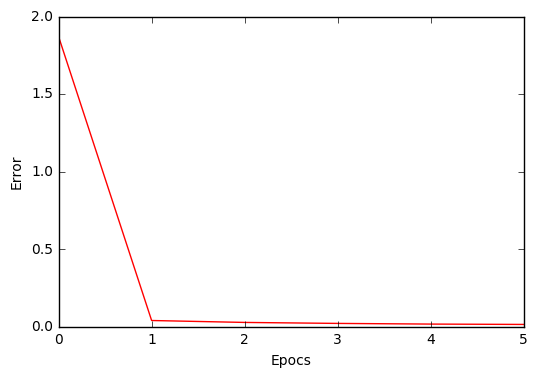

Training Error: 0.985357142857


In [136]:
from importlib.machinery import SourceFileLoader
from sklearn import preprocessing

X = train_scaled
lb = preprocessing.LabelBinarizer()
Y= lb.fit_transform(train_images['label'])

borna = SourceFileLoader("MLP", "../My MLP Implementation/MLP.py").load_module()
sigmoid = borna.sigmoid
identity= borna.identity
tanh = np.tanh

mlp= borna.bornaMLP([784,150,100,10],activations=[sigmoid,sigmoid,sigmoid],epocs=5,eta=.1,update='online')
#mlp = borna.bornaMLP([784,50,20,10],activations=[np.tanh,np.tanh,sigmoid],epocs=5,eta=.005,update='online')
mlp.fit(X,Y)
plt.plot(range(len(mlp.errors)), mlp.errors,'r')
plt.xlabel("Epocs")
plt.ylabel("Error")
plt.show()

labels = mlp.predict(X)
print ("Training Error:", sum(np.array(labels) == train_images['label'])/Y.shape[0])


#### With only few epocs we acheived around 98% accuracy on the training data

### Cross validation of my MLP for MNIST - I'll choose the best model in my cross validation

In [138]:
import random
# I don't know how to get my MLP to work with sklearn cross_validation library, so I wrote my own cross validator
def cross_validation(clf, X, Y, tt_ratio, cv=5):
    scores=[]
    all_indices = set(range(X.shape[0]))
    onenth = X.shape[0]*tt_ratio
    models=[]
    for i in range(1,cv+1):
        test_indices = random.sample(range(X.shape[0]),int(onenth))
        train_indices = all_indices.difference(test_indices)

        test_X = X[list(test_indices),:]
        test_Y = Y[list(test_indices),:]

        train_X = X[list(train_indices),:]
        train_Y = Y[list(train_indices),:]

        clf.fit(train_X,train_Y)
        test_predicted_Y = mlp.predict(test_X)

        scores.append(np.average(test_predicted_Y==np.argmax(test_Y,axis=1)))
        models.append(mlp)
        print ("Scores so far: ",scores,"\n")
    return scores,models


#mlp_cross = borna.bornaMLP([784,100,10],activations=10*[sigmoid],epocs=10,eta=.05,update='online')
#mlp_cross = borna.bornaMLP([784,50,20,10],activations=[np.tanh,np.tanh,sigmoid],epocs=5,eta=.03,update='online')
mlp_cross = borna.bornaMLP([784,150,100,10],activations=[sigmoid,sigmoid,sigmoid],epocs=15,eta=.1,update='online')


X = train_scaled
lb = preprocessing.LabelBinarizer()
Y= lb.fit_transform(train_images['label'])

scores,models = cross_validation(mlp_cross,X, Y,tt_ratio=.1,cv=3)
print ("Average test error of my MLP ->" , np.mean(scores))


epoc-> 1
epoc-> 2
epoc-> 3
epoc-> 4
epoc-> 5
epoc-> 6
epoc-> 7
epoc-> 8
epoc-> 9
epoc-> 10
epoc-> 10
Scores so far:  [0.98333333333333328] 

epoc-> 1
epoc-> 2
epoc-> 3
epoc-> 4
epoc-> 5
epoc-> 6
epoc-> 7
epoc-> 8
epoc-> 9
epoc-> 10
epoc-> 10
Scores so far:  [0.98333333333333328, 0.98404761904761906] 

epoc-> 1
epoc-> 2
epoc-> 3
epoc-> 4
epoc-> 5
epoc-> 6
epoc-> 7
epoc-> 8
epoc-> 9
epoc-> 10
epoc-> 10
Scores so far:  [0.98333333333333328, 0.98404761904761906, 0.9888095238095238] 

Average test error of my MLP -> 0.985396825397


In [140]:
# we use the best model
from sklearn.preprocessing import scale
best_mlp =  models[np.argmax(scores)] # choose the model with the best score

test_numpy = test_images.as_matrix()
test_scaled  = scale(test_numpy)# normalizing images

test_predictions = best_mlp.predict(test_scaled)
test_predictions = np.vstack([range(1,len(test_predictions)+1),test_predictions]) # attaching ImageIds
my_mlp_submission = pd.DataFrame(test_predictions.T,columns=['ImageId','Label'])
my_mlp_submission.to_csv('my_mlp_submission-300-tanh-sigmoid.csv',index =False)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


## The above submission got 95.4% accuracy on kaggle competition. Not the best accuracy compared to other submissions, but hey, I implemented my own MLP and backpropagation algorithm. Next step is going to be CNN implementation